In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#--------------------Reading Data from Google Drive------------------------

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading the file from Google Drive

data = pd.read_csv("/content/drive/My Drive/ER/KNN/Zoo.csv", sep = ',')
data.rename(columns = {"animal name":"animal_name"}, inplace = True)
data_x = data.drop(labels = ["type"], axis = 1)
data_y = data["type"]

In [5]:
  data_x.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [6]:
data_x.shape

(101, 17)

In [7]:
#Initial EDA

data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
dtypes: int64(16), object(1)
memory usage: 13.5+ KB


##Observations:

*   There are no null values in the dataset. 
*   All the variables are categorical in nature. 



In [8]:
data_x.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


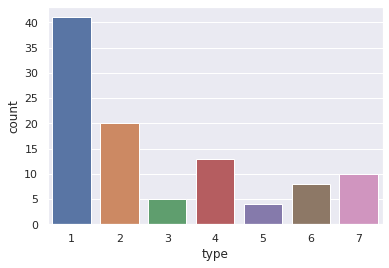

In [9]:
#Plot for count of target variable.

sns.set(style = "darkgrid")
sns.countplot(data_y)

## Observations:

*   The target varibale is of a multi class classification type.
*   The nuber of observations for the "Type 1" is more than any other observations.
*   This variable looks like unbalanced and biased towards "Type 1".





In [10]:
#Checking the number of unique animal names.
len(data_x["animal_name"].unique())

100

In [11]:
#Checking for frequency counts based on animal_names.
data_x["animal_name"].value_counts()

frog        2
honeybee    1
scorpion    1
vole        1
flea        1
           ..
rhea        1
sparrow     1
sole        1
bear        1
wallaby     1
Name: animal_name, Length: 100, dtype: int64

In [12]:
#Checking for any duplicate records based on animal_name.
data_x[data_x["animal_name"] == "frog"]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0


In [0]:
#Dropping the "animal_name" column.
data_x2 = data_x.drop(labels = ["animal_name"], axis = 1)

In [0]:
#Modelling
#Train Test Split of data.
X_train, X_test, y_train, y_test = train_test_split(data_x2, data_y, test_size = 0.2, stratify = data_y, random_state = 42)

In [0]:
#Applying KNN Algorithm on rest of the columns.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

In [0]:
#Confusion matrix for accuracy.

cm = confusion_matrix(y_test, y_predict)

In [17]:
#Confusion Matrix
cm

array([[8, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2]])

In [18]:
#sum of all the correct data predicted.
true_prediction = sum([cm[i][i] for i in range(0,7)])

accuracy = true_prediction/ len(y_test)

print("\n Accuracy for test data:" , accuracy)


 Accuracy for test data: 0.9523809523809523
